<a href="https://colab.research.google.com/github/nagendraputhane/pythonLibs/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

**DataFrame** - A DataFrame is like an in-memory 2D table. It can be viewed as like a spreadsheet, with column names and row labels.  
**Series** - A Series object is 1D array, similar to a column in a spreadsheet, with a column name and row labels.

# Series

Creating a series

In [0]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [0]:
s + [1000, 2000, 3000, 4000] #element wise

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [0]:
s + 100 #Broadcasting

0    102
1     99
2    103
3    105
dtype: int64

## Index labels
They are unique identifiers. The default value is equal to the rank of the item

In [0]:
s2 = pd.Series([68, 83, 112, 68], index = ["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

loc and iloc -> To make it clear when you are accessing by label or by integer location 

In [0]:
s2.loc["bob"]

83

In [0]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

The ambiguity that arises with numeric labels

In [0]:
surprise = pd.Series([0, 1, 2, 3, 4])
surprise

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [0]:
surprise_slice = surprise[2:] #the element with index 0 is absent
surprise_slice

2    2
3    3
4    4
dtype: int64

In [0]:
try:
  surprise_slice[0] #trying to access first element
except KeyError as e:
  print("Key error :", e)

Key error : 0


In [0]:
surprise_slice.iloc[0] #access integer location

2

In [0]:
meaning = pd.Series(42, ["life", "universe", "everything"]) #initialize a series object with a sclar and a list of index labels
meaning

life          42
universe      42
everything    42
dtype: int64

## Series name

In [0]:
s6 = pd.Series([83, 68], index = ["bob", "alice"], name = "weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a Series

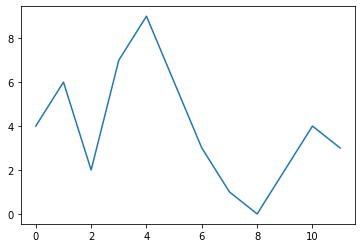

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4, 6, 2, 7, 9, 6, 3, 1, 0, 2, 4, 3]
s7 = pd.Series(temperatures, name = "temperature")
s7.plot()
plt.show()

# Handling Time


1.   It can represent periods (such as 2016Q3) and frequencies (such as "monthly")
2.   It can convert periods to actual timestamps, and vice versa.
3.   It can resample data and aggregate values any way you like.
4.   It can handle timezones.



## Time range
pd.date_range() returns a DatetimeIndex.

In [0]:
dates = pd.date_range('2016/10/29 5:30pm', periods = 12, freq = 'H')
dates #just a date-time-index

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [0]:
time_series = pd.Series(temperatures, dates)
time_series

2016-10-29 17:30:00    4
2016-10-29 18:30:00    6
2016-10-29 19:30:00    2
2016-10-29 20:30:00    7
2016-10-29 21:30:00    9
2016-10-29 22:30:00    6
2016-10-29 23:30:00    3
2016-10-30 00:30:00    1
2016-10-30 01:30:00    0
2016-10-30 02:30:00    2
2016-10-30 03:30:00    4
2016-10-30 04:30:00    3
Freq: H, dtype: int64

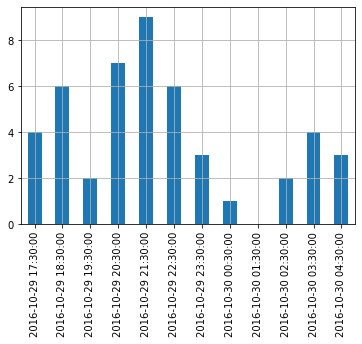

In [0]:
time_series.plot(kind = "bar")

plt.grid(True)
plt.show()

## Resampling
resample() - Specifying a new frequency.

In [0]:
time_series_freq_2H = time_series.resample("2H")
time_series_freq_2H

resampling operation is a deferred operation. To perform the resampling operation, call any methonds like mean(), min(), etc..

In [0]:
time_series_freq_2H = time_series_freq_2H.mean()
time_series_freq_2H

2016-10-29 16:00:00    4.0
2016-10-29 18:00:00    4.0
2016-10-29 20:00:00    8.0
2016-10-29 22:00:00    4.5
2016-10-30 00:00:00    0.5
2016-10-30 02:00:00    3.0
2016-10-30 04:00:00    3.0
Freq: 2H, dtype: float64

In [0]:
time_series_freq_2H = time_series.resample("2H").min()
time_series_freq_2H

2016-10-29 16:00:00    4
2016-10-29 18:00:00    2
2016-10-29 20:00:00    7
2016-10-29 22:00:00    3
2016-10-30 00:00:00    0
2016-10-30 02:00:00    2
2016-10-30 04:00:00    3
Freq: 2H, dtype: int64

In [0]:
import numpy as np
time_series_freq_2H = time_series.resample("2H").apply(np.min)
time_series_freq_2H

2016-10-29 16:00:00    4
2016-10-29 18:00:00    2
2016-10-29 20:00:00    7
2016-10-29 22:00:00    3
2016-10-30 00:00:00    0
2016-10-30 02:00:00    2
2016-10-30 04:00:00    3
Freq: 2H, dtype: int64

## Unsampling and interpolation
increasing the frequency

In [0]:
time_series_freq_15min = time_series.resample('15min').mean()
time_series_freq_15min.head(n=10) #it creates hole in the data

2016-10-29 17:30:00    4.0
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    6.0
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    2.0
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

fill the gaps by interpolating

In [0]:
temp_series_freq_15min = time_series.resample("15min").interpolate(method = "cubic")
temp_series_freq_15min.head(n = 10)

2016-10-29 17:30:00    4.000000
2016-10-29 17:45:00    6.309371
2016-10-29 18:00:00    7.174995
2016-10-29 18:15:00    6.953122
2016-10-29 18:30:00    6.000000
2016-10-29 18:45:00    4.671878
2016-10-29 19:00:00    3.325005
2016-10-29 19:15:00    2.315629
2016-10-29 19:30:00    2.000000
2016-10-29 19:45:00    2.612492
Freq: 15T, dtype: float64

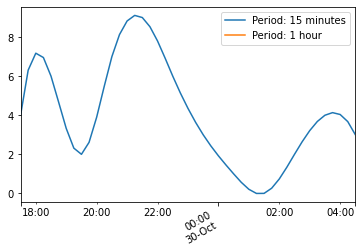

In [0]:
temp_series_freq_15min.plot(label = "Period: 15 minutes")
time_series.plot(label = "Period: 1 hour")
plt.legend()
plt.show()

# DataFrame
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. DataFrame can be viewed as dictionaries of Series.

Creating a DataFrame by passing a dictionary of Series objects:

In [0]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index = ["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index = ["bob", "alice", "charles"], name = "year"),
    "children": pd.Series([0, 3], index = ["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index = ["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN




1.   The Series were automatically aligned based on their index.
2.   Missing values are represented as NaN.
3.   Series names are ignored.



In [0]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Specifying columns and/or indexes.

In [0]:
d2 = pd.DataFrame(
    people_dict,
    columns = ["birthyear", "weight", "height"],
    index = ["bob", "alice", "eugene"]
)
d2 #it guarantees only these columns and/or rows exist

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


DataFrame from a dictionary of dictionaries.

In [0]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Multi-indexing

In [0]:
import numpy as np
d5 = pd.DataFrame(
    {
        ("public", "birthyear"):
          {("Paris", "alice"): 1985, ("Paris", "bob"): 1984, ("London", "charles"): 1992},
        ("public", "hobby"):
          {("Paris", "alice"): "Biking", ("Paris", "bob"): "Dancing"},
        ("private", "weight"):
          {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
        ("private", "children"):
          {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
    }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [0]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

Dropping Levels:

In [0]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

Transposing

In [0]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN        3       0

**Most methods return modified copies**

## Rows

In [0]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


The loc attribute lets you access rows instead of columns.

In [0]:
people.loc["bob"]

birthyear       1984
hobby        Dancing
weight            83
children           3
Name: bob, dtype: object

In [0]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

In [0]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## Adding and removing columns

In [0]:
people["ages"] = 2020 - people["birthyear"]
people["over 30"] = people["ages"] > 30
birthyears = people.pop("birthyear")
del people["children"]
people

,hobby,weight,ages,over 30
alice,Biking,68,35,True
bob,Dancing,83,36,True
charles,NaN,112,28,False


In [0]:
people["pets"] = pd.Series({"bob":0, "charles":5, "eugene":1})
people #when adding new column, missing rows are filled with NaN, and extra rows are ignored

,hobby,weight,ages,over 30,pets
alice,Biking,68,35,True,NaN
bob,Dancing,83,36,True,0.0
charles,NaN,112,28,False,5.0


insert() - Adding a column anythwhere you want.

In [0]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,ages,over 30,pets
alice,Biking,172,68,35,True,NaN
bob,Dancing,181,83,36,True,0.0
charles,NaN,185,112,28,False,5.0


## Assigning new columns
Used to create a new column. This returns a new DataFrame object.

In [0]:
people.assign(
    has_pets = people["pets"] > 0
)

,hobby,height,weight,ages,over 30,pets,has_pets
alice,Biking,172,68,35,True,NaN,False
bob,Dancing,181,83,36,True,0.0,False
charles,NaN,185,112,28,False,5.0,True


You can access columns created within the same assignment with the help of lambda functions.

In [0]:
(people.assign(
    body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2).assign(
        overweight = lambda df: df["body_mass_index"] > 25))

,hobby,height,weight,ages,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,35,True,NaN,22.985398,False
bob,Dancing,181,83,36,True,0.0,25.335002,True
charles,NaN,185,112,28,False,5.0,32.724617,True


Quering a DataFrame

In [0]:
people.query("ages > 30 and pets == 0")

,hobby,height,weight,ages,over 30,pets
bob,Dancing,181,83,36,True,0.0


## Sorting

In [0]:
people

,hobby,height,weight,ages,over 30,pets
alice,Biking,172,68,35,True,NaN
bob,Dancing,181,83,36,True,0.0
charles,NaN,185,112,28,False,5.0


sort_index() is used to sort

In [0]:
people.sort_index(ascending = False)

,hobby,height,weight,ages,over 30,pets
charles,NaN,185,112,28,False,5.0
bob,Dancing,181,83,36,True,0.0
alice,Biking,172,68,35,True,NaN


sort_index() returns a sorted copy. Use inplace argument to modify people.  
Specify axis = 1 to sort by columns.

In [0]:
people.sort_index(axis = 1, inplace = True)

In [0]:
people

,ages,height,hobby,over 30,pets,weight
alice,35,172,Biking,True,NaN,68
bob,36,181,Dancing,True,0.0,83
charles,28,185,NaN,False,5.0,112


sort_values() is used to sort by the values instead of the index

In [0]:
people.sort_values(by = "ages", inplace = True)
people

,ages,height,hobby,over 30,pets,weight
charles,28,185,NaN,False,5.0,112
alice,35,172,Biking,True,NaN,68
bob,36,181,Dancing,True,0.0,83


## Operations on DataFrames


In [0]:
import numpy as np

In [3]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, 
                      columns = ["sep", "oct", "nov"],
                      index = ["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [4]:
np.sqrt(grades) #apply NumPy mathematical functions

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [5]:
grades + 1 #broadcasting

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [6]:
grades >= 5 #binary operations

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [7]:
grades.mean() #aggregation operations

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [8]:
(grades > 5).all() #a() -> checks all values

sep    False
oct     True
nov    False
dtype: bool

In [9]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [12]:
(grades == 10).any(axis = 1) #any() -> checks if any value is True

alice      False
bob         True
charles    False
darwin      True
dtype: bool

In [10]:
grades - grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [11]:
grades.values.mean() #on whole values

8.0

*Adding NaN to a number results in NaN*

In [13]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [14]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


## Handling missing data

filna() -> used to replace NaN values with any other value

In [15]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


NaN points can be converted to 0 and then added.

In [17]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


interpolate data

In [18]:
bonus_points.interpolate(axis = 1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [19]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [0]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points

In [25]:
#remove unwanted rows and columns
#dropna() -> get rid of 
final_grades_clean = final_grades.dropna(how = "all")
final_grades_clean = final_grades_clean.dropna(axis = 1, how = "all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0
